In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Basic implementation (what we'll use)
X, y = make_classification(
    n_samples=1000,        # Number of rows
    n_features=5,          # Number of columns  
    n_classes=2,           # Categories (2 = Yes/No)
    random_state=42)

# Convert to DataFrame and display
df = pd.DataFrame(X, columns=['age', 'income', 'score', 'visits', 'rating'])
df['will_buy'] = y

print("Generated Customer Data:")
print(df.head(20))
print(f"\nDataset shape: {df.shape}")
print(f"Target distribution:\n{df['will_buy'].value_counts()}")



Generated Customer Data:
         age    income     score    visits    rating  will_buy
0  -0.439643  0.542547 -0.822420  0.401366 -0.854840         0
1   2.822231 -2.480859 -1.147691 -2.101131  3.040278         1
2   1.618386 -1.369478 -2.084113 -1.179659  1.613602         1
3   1.659048 -0.615202  1.112688 -0.835098 -0.272205         1
4   1.849824 -1.679456 -0.926698 -1.402509  2.123129         1
5   0.077111  0.237160  0.584413  0.087275 -0.661753         0
6  -0.388754  0.563365  0.014273  0.394581 -0.960128         0
7   2.040959 -0.508362 -1.776235 -0.909452 -0.941722         1
8   1.052441 -0.048267 -0.917503 -0.367493 -1.007995         1
9   0.763016 -0.158370  0.886887 -0.324968 -0.429449         0
10  1.223628 -1.070968  2.693034 -0.908775  1.306803         1
11 -1.437580  1.137972 -1.180813  1.010618 -1.241575         0
12 -1.802291  1.599489  0.845158  1.349004 -1.978662         1
13  0.969990 -0.262416 -0.808266 -0.442102 -0.396736         1
14 -2.271847  1.470974 -1.2932

In [2]:
from faker import Faker
import pandas as pd

fake = Faker('en_IN')
def make_customer():
    return {
        'name': fake.name(),
        'email': fake.email(),
        'phone': fake.phone_number(),
        'city': fake.city(),
        'company': fake.company(),
        'job': fake.job(),
        'salary': fake.random_int(20000, 100000),
        'age': fake.random_int(22, 60)
    }
# Generate and display data
customers = [make_customer() for _ in range(1000)]
df = pd.DataFrame(customers)

print("Sample Fake Customer Data:")
print(df.head())
print(f"\nData types:\n{df.dtypes}")
print(f"Salary range: {df['salary'].min()} to {df['salary'].max()}")



Sample Fake Customer Data:
             name                    email          phone         city  \
0     Januja Dave    geetika46@example.org  +913805114735  Madhyamgram   
1  Dominic Tandon     aarush66@example.com     8449634595     Bhilwara   
2   Yamini Mandal        gbehl@example.net     8501440491      Naihati   
3     Kabir Singh  ridhiparmer@example.org  +914458705627      Raiganj   
4      Sneha Dora      dipta27@example.net    04359803504    Bhavnagar   

                  company                                                job  \
0  Wason, Sarma and Gopal                                  Psychiatric nurse   
1     Bhattacharyya Group  Clinical scientist, histocompatibility and imm...   
2              Kata-Soman                                    Product manager   
3      Venkatesh and Sons              Product/process development scientist   
4   Ramaswamy-Rajagopalan                                      Advice worker   

   salary  age  
0   69146   22  
1   76434   2

In [4]:
import pandas as pd
from ctgan import CTGAN

# Load dataset
students_data = pd.read_csv  ("StudentsPerformance.csv")

# Identify categorical columns
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

# Convert categorical columns to object type (if not already)
for col in categorical_cols:
    students_data[col] = students_data[col].astype("object")

# Initialize CTGAN
model = CTGAN(
    epochs=100,       # Training rounds
    batch_size=50,    # Smaller batch size due to limited dataset size
    verbose=True,
    cuda=True
)

# Fit model
model.fit(students_data, discrete_columns=categorical_cols)

# Generate synthetic data
new_data = model.sample(2000)

# Show comparison
print("Original Data Sample:")
print(students_data.head())
print("\nOriginal shape:", students_data.shape)

print("\nGenerated Synthetic Data:")
print(new_data.head())
print("Generated shape:", new_data.shape)

# Compare one statistic as an example
print("\nOriginal mean math score:", students_data['math score'].mean().round(2))
print("Generated mean math score:", new_data['math score'].mean().round(2))
import pandas as pd
from ctgan import CTGAN

# Load dataset
students_data = pd.read_csv("StudentsPerformance.csv")

# Identify categorical columns
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

# Convert categorical columns to object type (if not already)
for col in categorical_cols:
    students_data[col] = students_data[col].astype("object")

# Initialize CTGAN
model = CTGAN(
    epochs=100,       # Training rounds
    batch_size=50,    # Smaller batch size due to limited dataset size
    verbose=True,
    cuda=True
)

# Fit model
model.fit(students_data, discrete_columns=categorical_cols)

# Generate synthetic data
new_data = model.sample(2000)

# Show comparison
print("Original Data Sample:")
print(students_data.head())
print("\nOriginal shape:", students_data.shape)

print("\nGenerated Synthetic Data:")
print(new_data.head())
print("Generated shape:", new_data.shape)

# Compare one statistic as an example
print("\nOriginal mean math score:", students_data['math score'].mean().round(2))
print("Generated mean math score:", new_data['math score'].mean().round(2))


Gen. (-1.17) | Discrim. (-0.58): 100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


Original Data Sample:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Original shape: (1000, 8)

Generated Synthetic Data:
   gender race/ethnicity parental level of education         lunch  \
0    male    

Gen. (-0.70) | Discrim. (-0.20): 100%|██████████| 100/100 [01:05<00:00,  1.54it/s]


Original Data Sample:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Original shape: (1000, 8)

Generated Synthetic Data:
   gender race/ethnicity parental level of education         lunch  \
0    male    

In [5]:
# Generate 1,00,000 synthetic samples
synthetic_data = model.sample(100000)

# Save to CSV
synthetic_data.to_csv("synthetic_student_data_100000.csv", index=False)

print("Synthetic data generated and saved as synthetic_student_data_10000.csv")
print("Shape:", synthetic_data.shape)
print("Preview:")
print(synthetic_data.head())


Synthetic data generated and saved as synthetic_student_data_10000.csv
Shape: (100000, 8)
Preview:
   gender race/ethnicity parental level of education         lunch  \
0    male        group C                some college  free/reduced   
1    male        group A           bachelor's degree  free/reduced   
2  female        group D             master's degree      standard   
3  female        group C          associate's degree  free/reduced   
4    male        group E             master's degree      standard   

  test preparation course  math score  reading score  writing score  
0                    none          48             44             59  
1                    none          34             26             34  
2                    none          99            111            108  
3                    none          43             40             34  
4                    none          65             37             31  


c:\Users\shobh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Data with Outliers:
        values  is_outlier
0   107.224890         0.0
1    99.833007         0.0
2   108.707809         0.0
3   134.661472         0.0
4    96.146076         0.0
5   115.658196         0.0
6   109.297889         0.0
7    73.691866         0.0
8    82.772768         0.0
9    69.926897         0.0
10  151.910319         1.0
11  105.596960         0.0
12  112.361754         0.0
13   77.110325         0.0
14   88.724156         0.0
15   95.348039         0.0
16  102.166792         0.0
17  119.510213         0.0
18  104.118023         0.0
19  130.589370         0.0

Total data points: 1050
Normal points: 950
Outlier points: 100


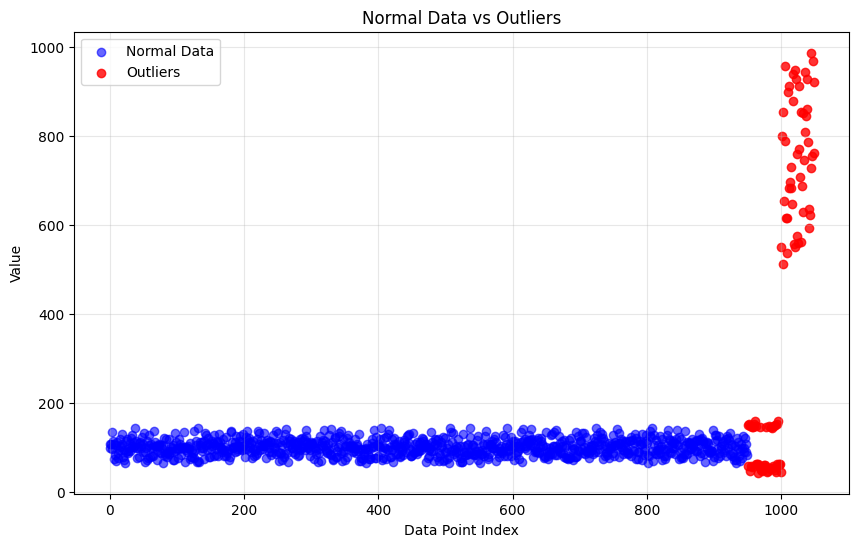

In [7]:
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
import numpy as np
import pandas as pd

# Generate normal data
normal_data = np.random.normal(100, 20, 1000)

# Basic outlier detection
outlier_detector = IForest(
    contamination=0.05,      # 5% outliers
    random_state=42          
)

outlier_labels = outlier_detector.fit_predict(normal_data.reshape(-1, 1))

# Add artificial outliers  
outlier_values = np.random.uniform(500, 1000, 50)
all_data = np.concatenate([normal_data, outlier_values])
all_labels = np.concatenate([outlier_labels, np.ones(50)])

# Create DataFrame and display
df = pd.DataFrame({
    'values': all_data, 
    'is_outlier': all_labels
})


print("Data with Outliers:")
print(df.head(20))
print(f"\nTotal data points: {len(df)}")
print(f"Normal points: {sum(df['is_outlier'] == 0)}")  
print(f"Outlier points: {sum(df['is_outlier'] == 1)}")

# Simple visualization
plt.figure(figsize=(10, 6))
normal_points = df[df['is_outlier'] == 0]['values']
outlier_points = df[df['is_outlier'] == 1]['values']

plt.scatter(range(len(normal_points)), normal_points, 
           c='blue', alpha=0.6, label='Normal Data')
plt.scatter(range(len(normal_points), len(df)), outlier_points,
           c='red', alpha=0.8, label='Outliers')
           
plt.title('Normal Data vs Outliers')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

   